In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv('block_data.csv')

In [5]:
df.head()

,timestamp,blockReward
0,1705168619,0.027871
1,1705168631,0.016633
2,1705168643,0.063812
3,1705168655,0.014744
4,1705168667,0.023356


In [6]:
# Convert columns to correct types (just in case)
df['timestamp'] = pd.to_numeric(df['timestamp'], errors='coerce')
df['blockReward'] = pd.to_numeric(df['blockReward'], errors='coerce')

In [7]:
# Drop NaNs if any
df = df.dropna()

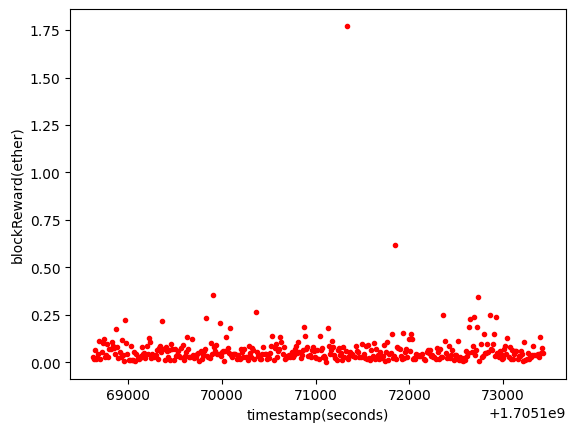

In [12]:
%matplotlib inline
plt.xlabel('timestamp(seconds)')
plt.ylabel('blockReward(ether)')
plt.scatter(df.timestamp, df.blockReward, color='red', marker='.')

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(df.timestamp.values.reshape(-1,1), df.blockReward.values.ravel())

RandomForestRegressor(random_state=42)

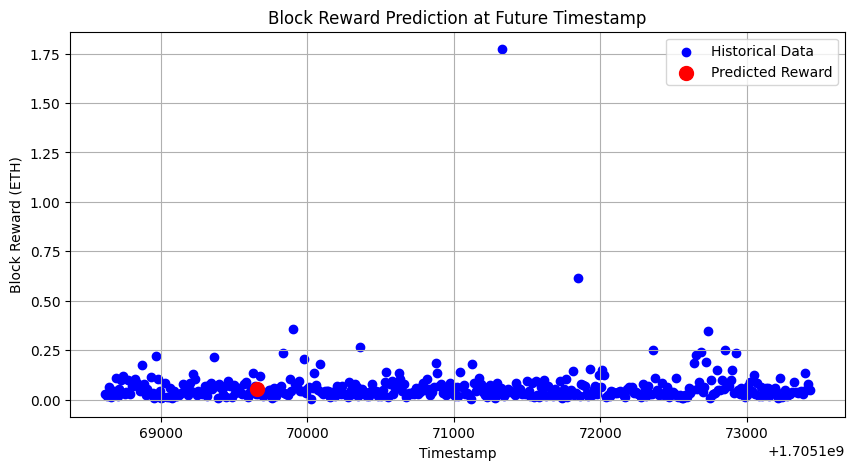

Predicted block reward at timestamp 1705169654 is: 0.05245425918944061 ether


In [17]:
new_timestamp = np.array([[1705169654]])
predicted_blockReward = model.predict(new_timestamp)

# Plot historical data in blue
plt.figure(figsize=(10, 5))
plt.scatter(df.timestamp, df.blockReward, color='blue', label='Historical Data')

# Plot predicted point in red
plt.scatter(new_timestamp, predicted_blockReward, color='red', label='Predicted Reward', s=100, marker='o')

plt.xlabel('Timestamp')
plt.ylabel('Block Reward (ETH)')
plt.title('Block Reward Prediction at Future Timestamp')
plt.legend()
plt.grid(True)
plt.show()

print("Predicted block reward at timestamp", new_timestamp[0][0], "is:", predicted_blockReward[0], "ether")
